# Visualisation du jeu de données 

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


C:\Users\tony9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


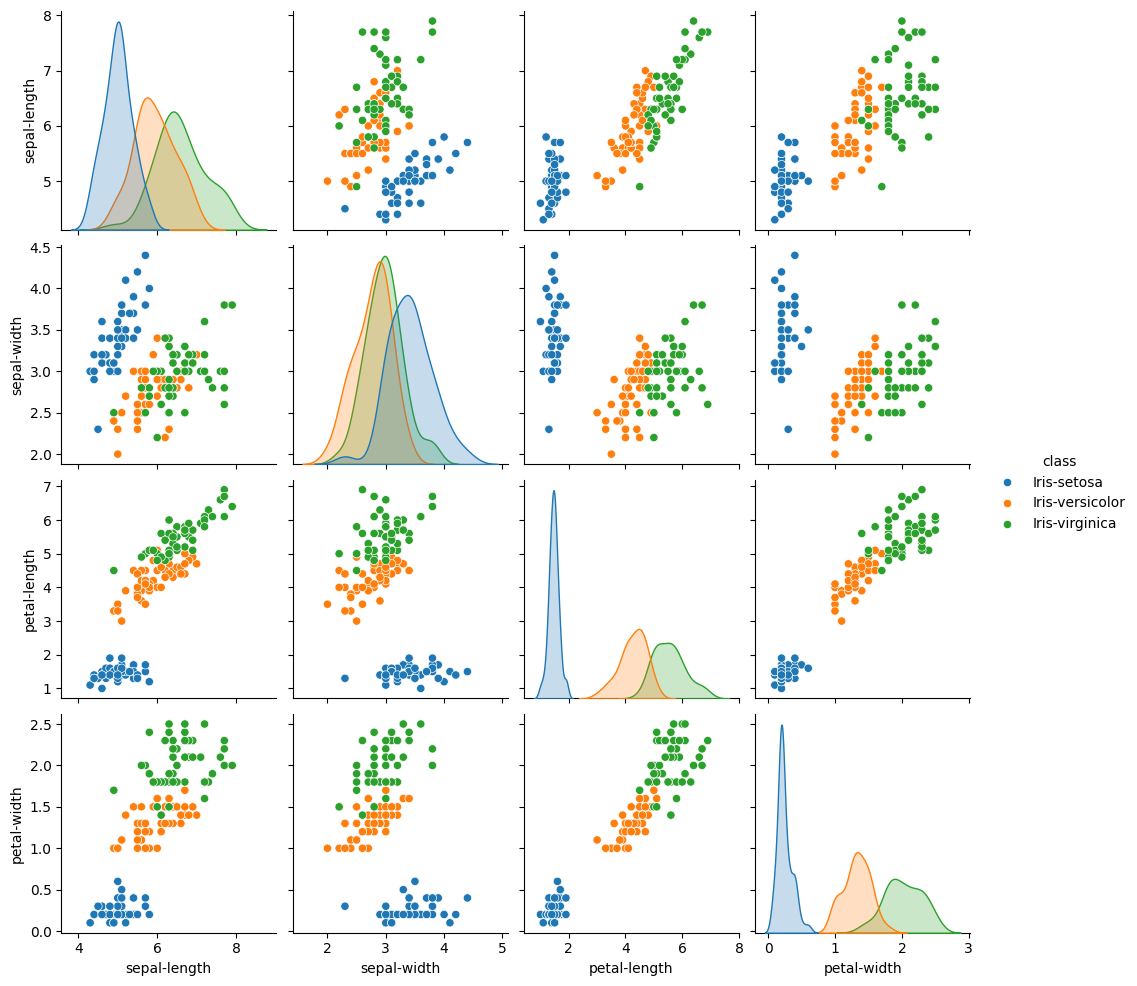

In [28]:
import time
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import DBSCAN

# Charger les données
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset_iris = pd.read_csv(url, names=col_names)
# Extraire les caractéristiques et les étiquettes
X_iris = dataset_iris.drop('class', axis=1)  # caractéristiques
y_iris = dataset_iris['class']  # étiquettes
print(dataset_iris)

# Voir le dataset 
sns.color_palette("pastel")
sns.pairplot(dataset_iris,hue='class')
plt.show()


# 1 K-means avec Iris

C:\Users\tony9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


time 3 : 0.0995326042175293


C:\Users\tony9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


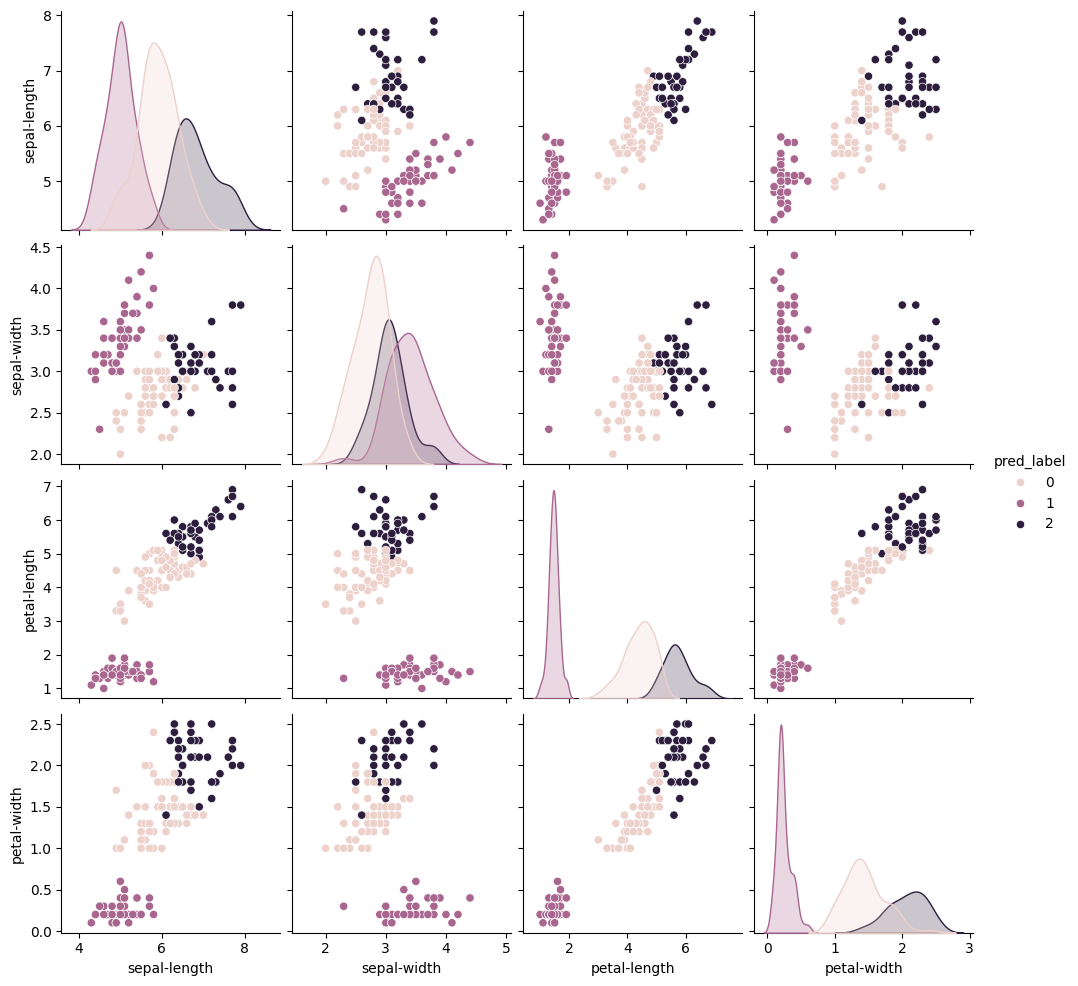

In [24]:
# Kmeans avec Iris

k = 3 

start = time.time()
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X_iris)
end = time.time()

# afficher le temps mesuré
print(f'time {k} : {end-start}') # temps tres court de 0.099 seconds

# Predict cluster labels for the dataset
labels = kmeanModel.predict(X_iris)

# visualize dataset with predicted labels
cluster_series1 = pd.Series(labels, name='pred_label')
val1 = pd.concat([X_iris, cluster_series1], axis=1)
sns.color_palette("pastel")
sns.pairplot(val1,hue='pred_label')
plt.show() # résultats proches de la réalité

L'algorithme d'Elkan est plus efficace en général sur les grands jeux de données avec de nombreux clusters, mais comme le dataset iris est assez petit, ce n'est pas la peine d'utiliser cet algorithme ici.

# 2 Classification hiérarchique ascendante avec iris / agglomérative

Time elapsed : 0.35994958877563477


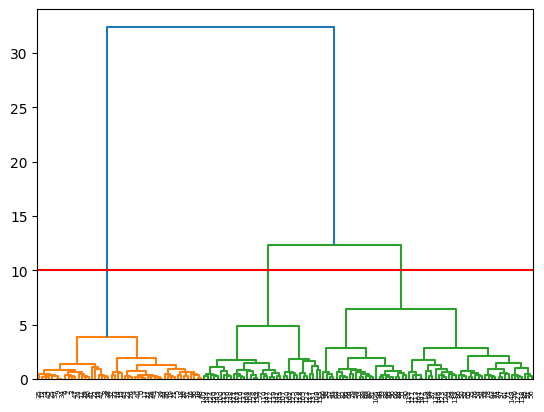

In [46]:
# 1ère Classification hiérarchique ascendante avec dataset Iris

from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# to measure performance
start = time.time()
# création du dendrogramme
link = hc.linkage(X_iris, method="ward", metric="euclidean")
# average, complete = saut max, single = saut min, ward = autre
dendograms = hc.dendrogram(link, labels=X_iris.index)
clusters_cah_1 = fcluster(link, 10, criterion='distance')
end = time.time()

print(f'Time elapsed : {end-start}') # on voit déjà que ça prend plus de temps que K-means
plt.axhline(y=10,c='r')

C:\Users\tony9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


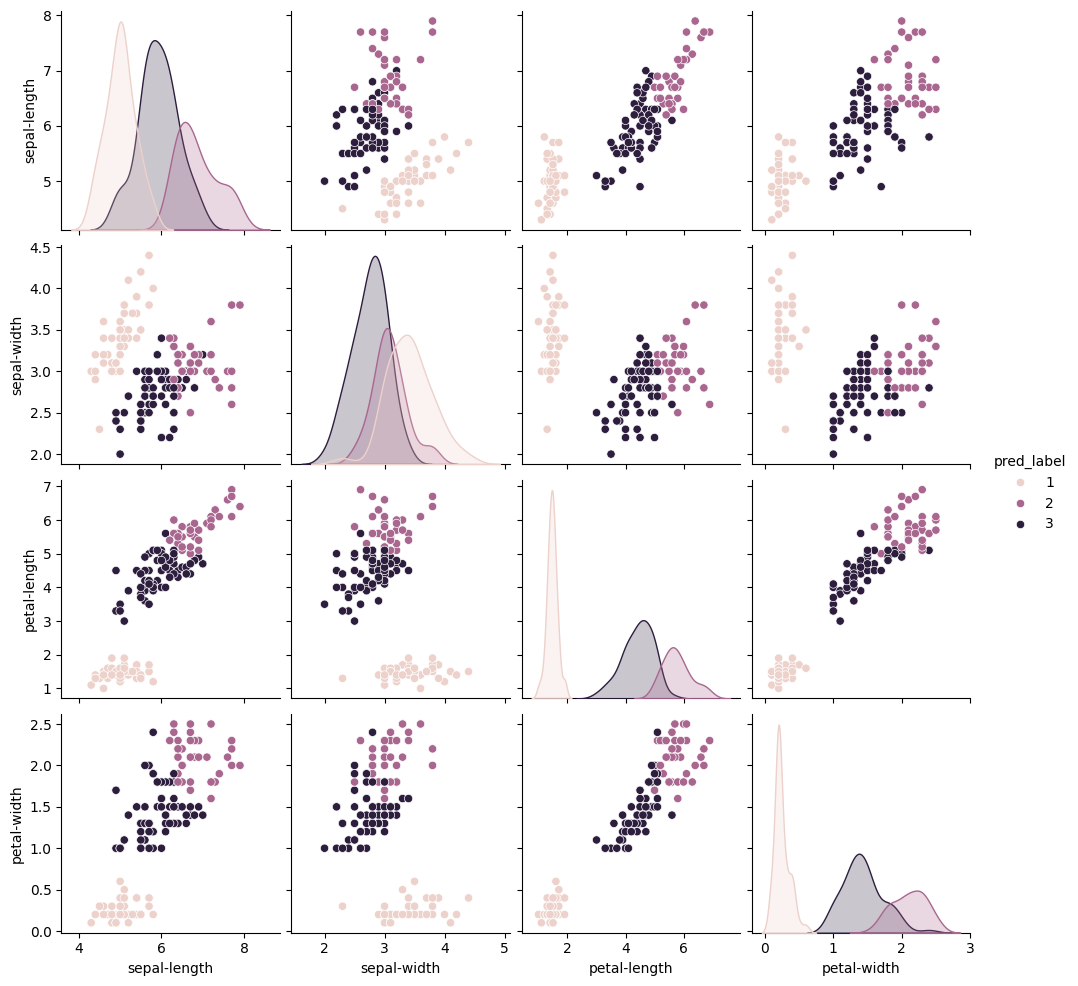

In [47]:

# visualize dataset with predicted labels
cluster_series2 = pd.Series(clusters_cah_1, name='pred_label')
val2 = pd.concat([X_iris, cluster_series2], axis=1)
sns.color_palette("pastel")
sns.pairplot(val2,hue='pred_label')
plt.show() # résultats proches de la réalité

## 2.1 CHA avec d'autres paramètres qui font augmenter la vitesse de calcul

Ici nous faisons la même chose mais avec le paramètre truncate_mode='level' et p=3 pour limiter le calcul à 3 niveaux.

Comparaison :

Nous voyons que le résultat est beaucoup plus rapide : 3 à 4 fois dans notre exemple.



     sepal-length  sepal-width  petal-length  petal-width  pred_label
0             5.1          3.5           1.4          0.2           1
1             4.9          3.0           1.4          0.2           1
2             4.7          3.2           1.3          0.2           1
3             4.6          3.1           1.5          0.2           1
4             5.0          3.6           1.4          0.2           1
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           2
146           6.3          2.5           5.0          1.9           3
147           6.5          3.0           5.2          2.0           2
148           6.2          3.4           5.4          2.3           2
149           5.9          3.0           5.1          1.8           3

[150 rows x 5 columns]
Time elapsed : 0.07300853729248047


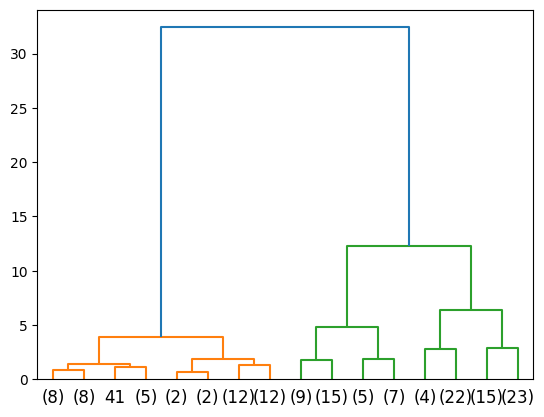

In [56]:
# 2ème Classification hiérarchique ascendante avec dataset Iris

# to measure performance
start = time.time()
# création du dendrogramme
link = hc.linkage(X_iris, method="ward", metric="euclidean")
# average, complete = saut max, single = saut min, ward = autre
dendograms = hc.dendrogram(link, labels=X_iris.index, truncate_mode='level', p=3) # on arrête les calculs au niveau 3
clusters_21 = fcluster(link, 10, criterion='distance')
end = time.time()

# dataset with predicted labels
cluster_series_cha_21 = pd.Series(clusters_21, name='pred_label')
val_cah_21 = pd.concat([X_iris, cluster_series_cha_21], axis=1)

print(val_cah_21)
print(f'Time elapsed : {end-start}') # Le temps est nettement plus rapide avec ces paramètres, et il est un peu plus rapide que K-means


C:\Users\tony9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


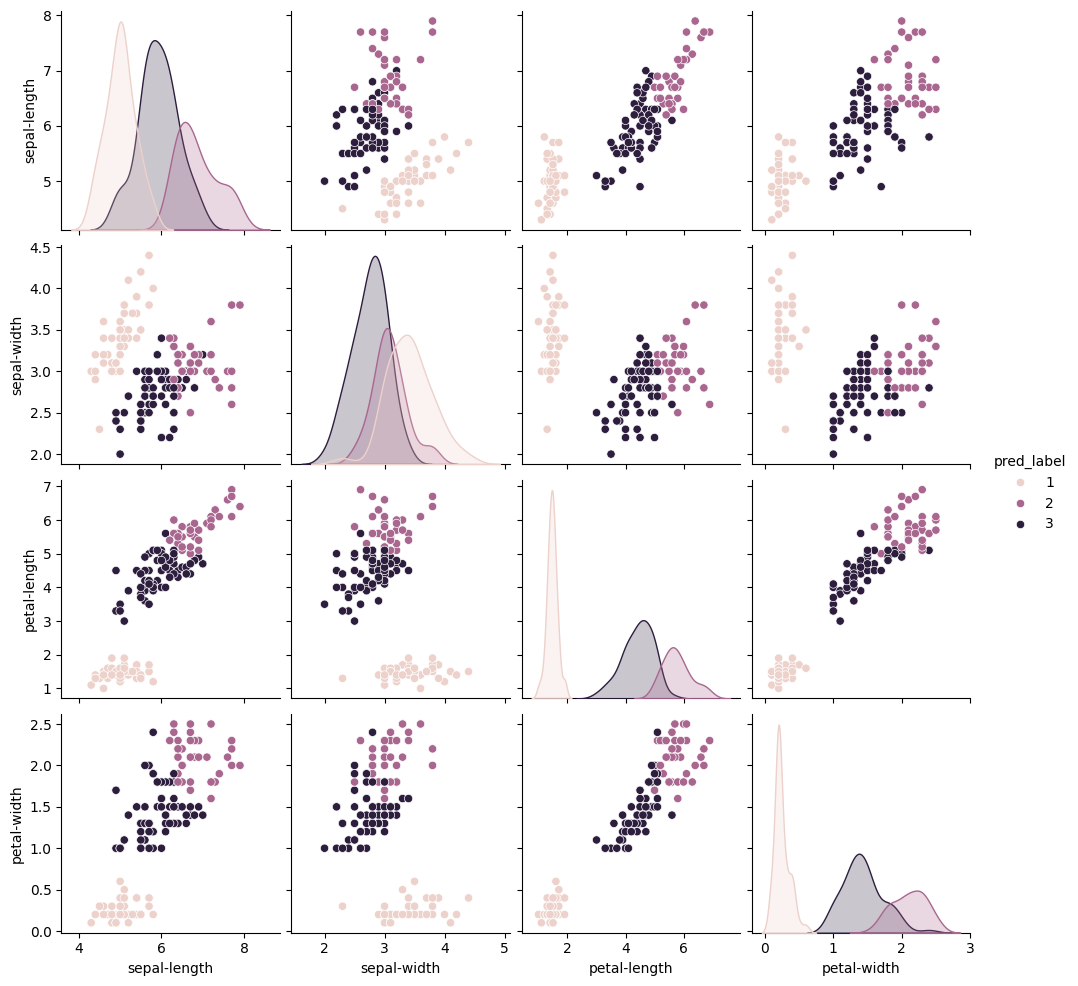

In [57]:

# visualize dataset with predicted labels
sns.color_palette("pastel")
sns.pairplot(val_cah_21,hue='pred_label')
plt.show() # résultats proches de la réalité

# DBSCAN sur Iris

DBSCAN, qui signifie "Density-Based Spatial Clustering of Applications with Noise", est un algorithme populaire de clustering (regroupement) utilisé en apprentissage automatique et en analyse de données. Voici les caractéristiques principales de DBSCAN :

Clustering Basé sur la Densité :

Contrairement à d'autres méthodes de clustering comme K-means, DBSCAN regroupe les points de données en se basant sur leur densité. Cela signifie qu'il forme des clusters à partir de régions denses en points de données, séparées par des régions moins denses.

Détection de Bruit :

DBSCAN est capable d'identifier et de traiter le bruit dans les données (c'est-à-dire les points de données qui ne font partie d'aucun cluster).

Deux Paramètres Clés :

Epsilon (ε) : Il s'agit du rayon de voisinage autour d'un point de données. Si deux points sont à moins de cette distance, ils sont considérés comme voisins.
MinPts : Le nombre minimum de points requis pour former un cluster dense. Un point doit avoir au moins MinPts voisins dans son rayon epsilon pour être considéré comme un point central (core point) d'un cluster.

Fonctionnement de l'Algorithme :

Points Centraux : Si un point a suffisamment de voisins dans son rayon ε, il devient un point central.
Points de Bordure : Les points qui ne sont pas centraux mais sont voisins d'un point central.
Points de Bruit : Les points qui ne sont ni centraux ni de bordure.

Avantages :

DBSCAN ne nécessite pas de spécifier le nombre de clusters à l'avance.
Il peut identifier des clusters de formes arbitraires, contrairement à K-means qui est limité aux clusters sphériques.
Il est efficace pour éliminer le bruit et détecter les outliers.

Limitations :

Le choix des paramètres ε et MinPts peut être difficile et a un impact significatif sur les résultats.
L'algorithme peut ne pas bien fonctionner lorsque les clusters ont des densités très différentes.
Il peut être moins efficace sur des ensembles de données de très grande dimension (fléau de la dimensionnalité).
DBSCAN est largement utilisé dans diverses applications, notamment la détection d'anomalies, la segmentation d'images, la géolocalisation, et dans les domaines où les données peuvent être de formes irrégulières et où la présence de bruit est un problème.







In [69]:
TRAIN_LABEL_COL = "class"
train = pd.concat([X_iris,y_iris],axis=1)

TRAIN_FEATURES = [col for col in train.columns if col != TRAIN_LABEL_COL]
X = train[TRAIN_FEATURES]
y = train[TRAIN_LABEL_COL]

L'hyperparametre pour dbscan est epsilon elle determine la distance maximale entre deux clusters

In [82]:
import time
import numpy as np 

start=time.time()

dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(X) # le fit doit être dans le calcul du temps - durée 0 c'est fort quand même

end = time.time()


y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([X,y_pred_df],axis=1)

print(val)
print("la durée")
print(end-start)

     sepal-length  sepal-width  petal-length  petal-width  pred_label
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           1
146           6.3          2.5           5.0          1.9           1
147           6.5          3.0           5.2          2.0           1
148           6.2          3.4           5.4          2.3           1
149           5.9          3.0           5.1          1.8           1

[150 rows x 5 columns]
la durée
0.00899815559387207


Nouveau cluster grace à DBSCAN 

C:\Users\tony9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


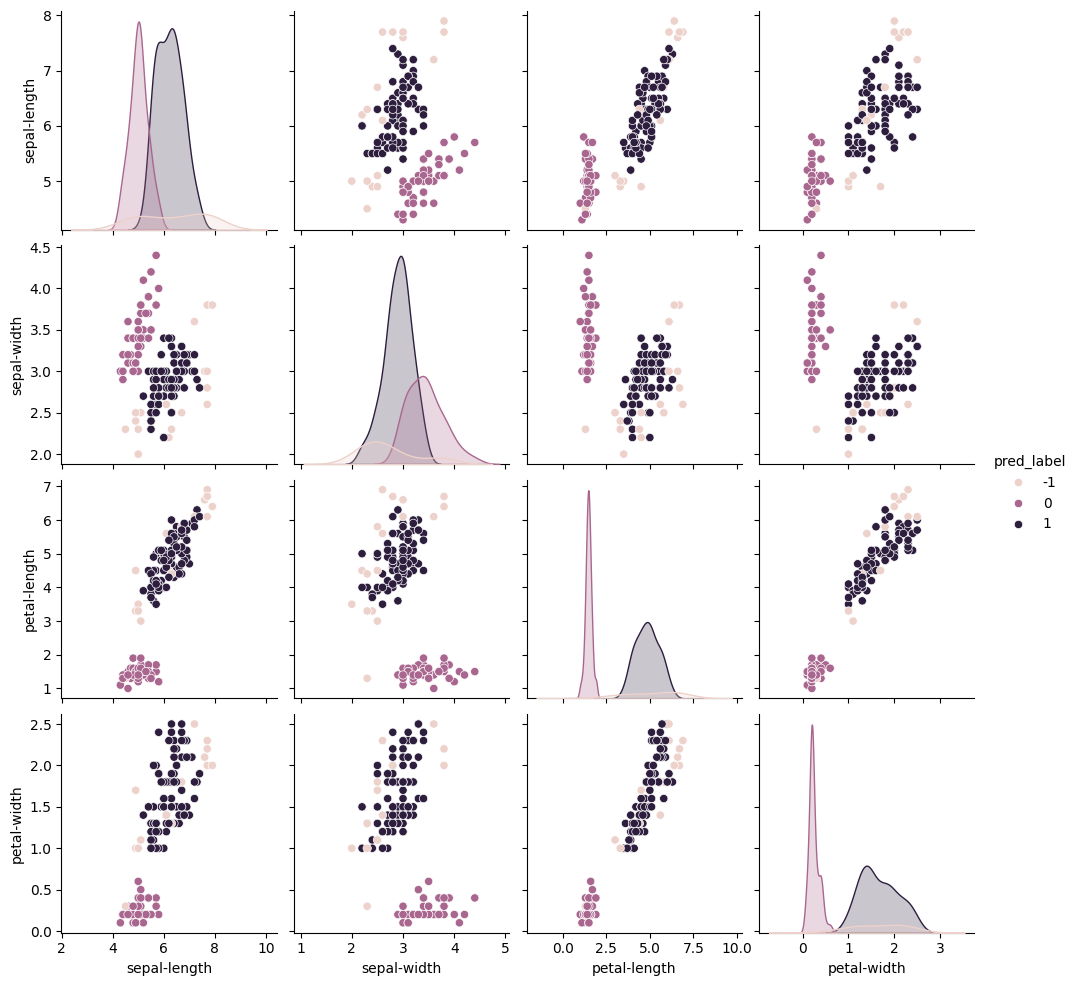

In [68]:
sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show() 

# HDBSCAN

HDBSCAN, qui signifie "Hierarchical Density-Based Spatial Clustering of Applications with Noise", est un algorithme de clustering avancé qui étend les concepts de DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Il a été développé pour surmonter certaines des limitations de DBSCAN, notamment en ce qui concerne la sélection des paramètres et la gestion des clusters de densités variables. Voici quelques points clés à propos de HDBSCAN :

1. **Approche Hiérarchique** :
   - HDBSCAN applique une approche hiérarchique pour trouver des clusters. Il construit d'abord un arbre de clustering en fonction de la densité, puis simplifie cet arbre pour former les clusters finaux.



2. **Gestion des Densités Variables** :
   - Contrairement à DBSCAN, HDBSCAN peut gérer efficacement des clusters de densités différentes. Il n'est pas nécessaire que tous les clusters aient une densité similaire pour être détectés correctement.



3. **Moins de Paramètres à Définir** :
   - Alors que DBSCAN nécessite de définir deux paramètres (ε et MinPts), HDBSCAN simplifie ce processus en exigeant principalement de spécifier un seul paramètre principal, le `min_cluster_size`, qui est le nombre minimum de points requis pour former un cluster.



4. **Détection de Bruit** :
   - Tout comme DBSCAN, HDBSCAN peut identifier et isoler le bruit dans les données, traitant les points qui ne s'intègrent dans aucun cluster comme des outliers.



5. **Flexibilité et Efficacité** :
   - HDBSCAN est flexible et efficace pour une variété d'applications, en particulier lorsque la structure des données n'est pas clairement définie ou lorsque les clusters présentent des variations de densité.



6. **Applications** :
   - HDBSCAN est utilisé dans des domaines variés comme la science des données, la reconnaissance de formes, la bioinformatique, et l'analyse d'image, où il est nécessaire de détecter des groupes naturels dans les données sans présupposer leur nombre ou leur forme.



7. **Limitations** :
   - Bien que HDBSCAN soit moins sensible aux paramètres que DBSCAN, le choix du `min_cluster_size` peut toujours influencer significativement les résultats.
   - Il peut être plus complexe à comprendre et à interpréter que des méthodes de clustering plus simples.


En résumé, HDBSCAN est un algorithme de clustering puissant et flexible, particulièrement utile pour les ensembles de données où les clusters peuvent avoir des densités variables et où la détermination d'un nombre approprié de clusters n'est pas évidente.

Pour cette partie Ndaya l'a faite avec son ordinateur (Mac), mais sur le mien ça ne fonctionne pas donc je laisse juste les résultats qu'elle a eu en copie ici.

In [ ]:
import plotly.express as px
fig = px.scatter(df, x = 'SepalLengthCm', y = 'SepalWidthCm', color=df["Species"])
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
fig = px.scatter(df, x = 'PetalLengthCm', y = 'PetalWidthCm', color=df["Species"])
fig.update_layout(width=600, height=500)
fig.show()

# Cluster HDBSCAN 



In [ ]:
import hdbscan

In [ ]:
start2=time.time()
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, cluster_selection_epsilon=0.01)

In [ ]:
hdb_label = hdbscan_model.fit_predict(train_x)
end2=time.time()
print("Le temps")
print(end2-start2)
hdb_label[:10]

Le temps
0.02996826171875


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
hdb_df = X_iris.copy()
hdb_df["hdb_label"] = hdb_label
hdb_df["hdb_label"] = hdb_df["hdb_label"].astype(str)

fig = px.scatter(hdb_df, x = 'SepalLengthCm', y = 'SepalWidthCm', color="hdb_label")
fig.update_layout(width=600, height=500)
fig.show() # visualisation du résultat obtenu avec HDBSCAN